# Hyperparameter Tuning


In [1]:
# Importing the libraries
import joblib
import os
import pandas as pd

In [2]:
# Load and preprocess the train data 
from pipelines import pipeline

data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_data = pd.read_csv(data_file, index_col=0, low_memory=False)
train_data = pipeline.fit_transform(train_data)
train_data.head()

,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,...,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00,day_phase_evening,day_phase_late_evening,day_phase_morning,day_phase_night,day_phase_noon
id,,,,,,,,,,,,,,,,,,,,,
p01_0,3.010946,3.036854,3.058520,3.077182,3.058790,3.036106,3.010287,2.891837,2.769117,2.643477,...,-0.322262,-0.322444,-0.322369,-0.322006,13.4,0,0,1,0,0
p01_1,3.077700,3.059133,3.036247,3.010440,2.891726,2.768845,2.643239,2.524302,2.401620,2.276426,...,-0.322262,-0.322444,-0.322369,-0.322006,12.8,0,0,1,0,0
p01_2,3.010946,2.892047,2.768966,2.643360,2.524187,2.401361,2.276190,2.201317,2.123213,2.042848,...,-0.322262,-0.322444,-0.322369,-0.322006,15.5,0,0,1,0,0
p01_3,2.643797,2.524459,2.401455,2.276279,2.201197,2.122964,2.042614,1.989706,1.933896,1.876007,...,-0.322262,-0.322444,-0.322369,-0.322006,14.8,0,0,1,0,0
p01_4,2.276648,2.201427,2.123038,2.042683,1.989584,1.933654,1.875774,1.867194,1.855942,1.842639,...,-0.322262,-0.322444,-0.322369,-0.322006,12.7,0,0,1,0,0


In [3]:
X = train_data.drop(columns=['bg+1:00'])
y = train_data['bg+1:00']

### Define a tuning function

In [4]:
def tune(tuner, X, y):
    print(f'-----------{tuner.__name__}-----------')
    print('Calculating best hyperparameters...')
    tuner.fit(X=X, y=y)
    print('Best hyperparameters found.')
    display(tuner.get_params())
    print(f'RMSE: {tuner.get_rmse()}')
    tuner.show_chart()
    joblib.dump(tuner.get_best_model(), f'{tuner.__name__}.model.pkl')

### Tune XGBoost

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 1e-10),
             ('colsample_bytree', 1.0),
             ('gamma', 0),
             ('lambda', 0.2552996708014773),
             ('learning_rate', 0.019837870344990804),
             ('max_depth', 6),
             ('min_child_weight', 1),
             ('n_estimators', 231),
             ('scale_pos_weight', 52),
             ('subsample', 1.0)])

RMSE: 1.9224148584791174


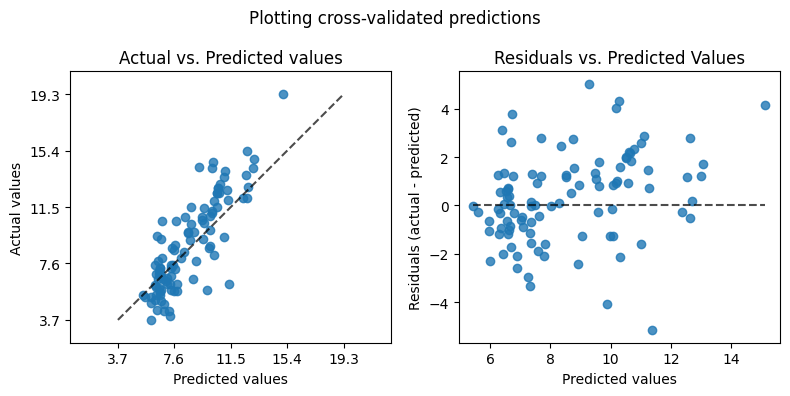

In [5]:
from src.features.tuners import XGBHyperparameterTuner

tune(XGBHyperparameterTuner(search_space='deep'), X, y)

### Tune ExtraTreesRegressor

-----------ExtraTreeRegressor-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best hyperparameters found.


OrderedDict([('max_depth', 7),
             ('max_features', 1.0),
             ('min_samples_leaf', 10),
             ('min_samples_split', 20),
             ('splitter', 'best')])

RMSE: 2.0324462388181783


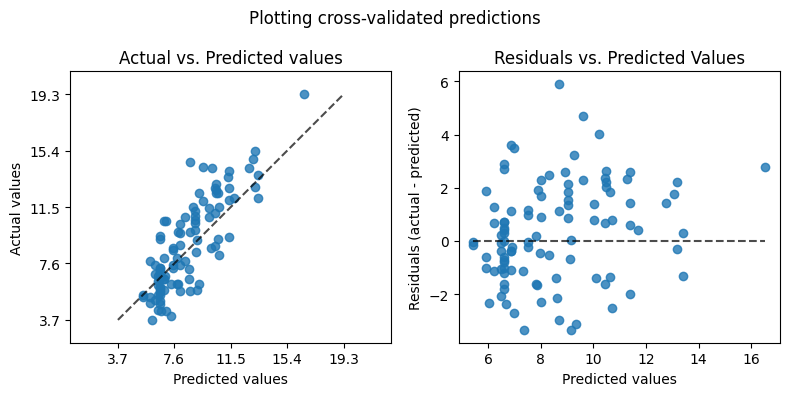

In [6]:
from src.features.tuners import ExtraTreesHyperparameterTuner

tune(ExtraTreesHyperparameterTuner(), X, y)

### Tune BaggingRegressor

-----------BaggingRegressor-----------
Calculating best hyperparameters...


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best hyperparameters found.


OrderedDict([('max_features', 0.9971834473302514),
             ('max_samples', 0.5015366892800169),
             ('n_estimators', 100)])

RMSE: 1.1122431292658972


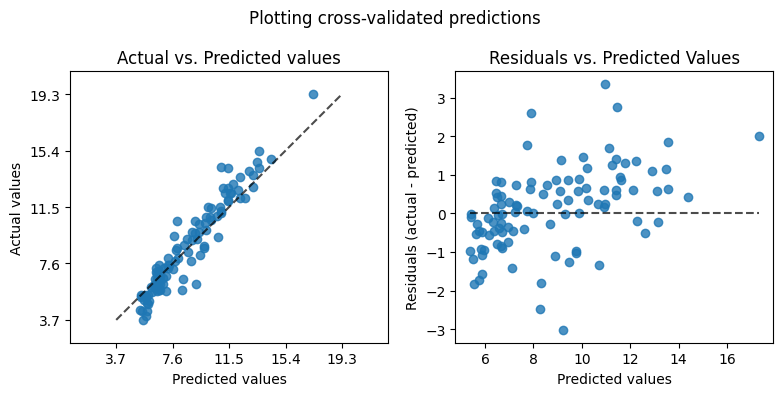

In [7]:
from src.features.tuners import BaggingHyperparameterTuner

tune(BaggingHyperparameterTuner(), X, y)